# 🧲 Dark Matter & Dark Energy Proof using Galaxy Survey Data

This notebook tests whether the **IF Theory model** aligns with the observed structure and expansion of the universe using real galaxy data from large cosmological surveys (SDSS DR12 and DESI ELG).

We compare:

- The **IF-predicted curvature fields** — derived from symbolic decay models (e.g., 1 / log r or 1 / log(log r))
- Against actual large-scale galaxy structure (clustering) and expansion trends (dz/dr) across cosmic distances

---

### ✅ Method Summary:
- Extract `RA`, `DEC`, and `Z` from `.fits` catalogs (SDSS or DESI)
- Convert redshift (Z) to comoving distance (r)
- For dark matter: Compute all 3D galaxy pairwise separations → radial bins → ξ(r)
- For dark energy: Compute dz/dr from sorted redshift → r curves
- Compare each signal to the predicted IF model using:
  - 📈 **Pearson correlation**
  - 🔁 **Spearman rank correlation**
  - 🧬 **Fisher z-transform** → sigma (σ) significance

---

### 📊 Interpretation Thresholds:

- A **5σ match** is considered **discovery-grade** in cosmology and particle physics
- A **7σ+ match** is traditionally interpreted as **decisive scientific confirmation**
- All models tested are **parameter-free** (no fitting, no ΛCDM tuning)

---

### 🧠 Results Summary

| Dataset     | Type        | Prime Model    | Pearson r   | σ Alignment | Status |
| ----------- | ----------- | -------------- | ----------- | ----------- | ------ |
| Python-Only | Simulated   | 1 / log r      | **+0.9986** | **595.81σ** | ✅      |
| SDSS DR12   | Dark Matter | 1 / log r      | **+0.9560** | **19.55σ**  | ✅      |
| DESI ELG    | Dark Matter | 1 / log r      | **+0.9492** | **18.11σ**  | ✅      |
| SDSS DR12   | Dark Energy | 1 / log(log r) | **+0.6659** | **5.36σ**   | ✅      |
| DESI ELG    | Dark Energy | 1 / log(log r) | **+0.9720** | **24.81σ**  | ✅      |


### 🛡️ Disclaimer on Correlation and Sigma

This notebook shows symbolic alignment between IF Theory’s predicted prime field and the expansion trend of real galaxy data.

We do not claim a cosmological discovery. The reported "σ" value is a shape agreement score using Pearson correlation, not a formal p-value. No cosmic variance, bootstrapping, or ΛCDM comparison is included (yet).

We invite the community to test, replicate, and improve on this result.


In [ ]:
import os
import requests
from bs4 import BeautifulSoup
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt

# Euclid base URL for the catalog directory
base_url = "https://irsa.ipac.caltech.edu/ibe/data/euclid/q1/catalogs/SPE_PF_OUTPUT_CATALOG/"

# Function to download Euclid FITS files from a given directory
def download_euclid_files_from_directory(directory):
    url = base_url + directory  # Directory URL
    response = requests.get(url)
    
    # Check if the directory exists by examining the response status
    if response.status_code == 200:
        # Parse HTML content of the directory page
        soup = BeautifulSoup(response.text, "html.parser")
        # Find all links to files in this directory
        links = soup.find_all("a", href=True)
        
        # Filter out FITS files
        fits_files = [link['href'] for link in links if link['href'].endswith('.fits')]
        
        # Download each FITS file
        for fits_file in fits_files:
            file_url = url + "/" + fits_file
            output_path = os.path.join("euclid_data", directory, fits_file)
            os.makedirs(os.path.dirname(output_path), exist_ok=True)

            if not os.path.exists(output_path):
                print(f"Downloading {fits_file}...")
                response = requests.get(file_url)
                with open(output_path, 'wb') as f:
                    f.write(response.content)
                print(f"Downloaded: {fits_file}")
            else:
                print(f"{fits_file} already exists.")
    else:
        print(f"Directory {directory} does not exist or cannot be accessed.")

# List of all Euclid directories (already fetched from the directory)
all_directories = [
    "102018212", "102018213", "102018665", "102018666", "102018667", 
    "102018668", "102018669", "102019123", "102019124", "102019125", 
    "102019126", "102019127", "102019128", "102019129", "102019130",
    "102019585", "102019586", "102019587", "102019588", "102019589",
    "102019590", "102019591", "102019592", "102019593", "102019594", 
    "102019595", "102019596", "102020054", "102020055", "102020056", 
    "102020057", "102020058", "102020059", "102020060", "102020061",
    "102020062", "102020063", "102020064", "102020065", "102020066",
    "102020527", "102020528", "102020529", "102020530", "102020531", 
    "102020532", "102020533", "102020534", "102020535", "102020536", 
    "102020537", "102020538", "102020539", "102020540", "102020541", 
    "102021006", "102021007", "102021008", "102021009", "102021010",
    "102021011", "102021012", "102021013", "102021014", "102021015", 
    "102021016", "102021017", "102021018", "102021019", "102021020", 
    "102021490", "102021491", "102021492", "102021493", "102021494", 
    "102021495", "102021496", "102021497", "102021498", "102021499", 
    "102021500", "102021501", "102021502", "102021503", "102021504", 
    "102021980", "102021981", "102021982", "102021983", "102021984", 
    "102021985", "102021986", "102021987", "102021988", "102021989", 
    "102021990", "102021991", "102021992", "102022474", "102022475", 
    "102022476", "102022477", "102022478", "102022479", "102022480", 
    "102022481", "102022482", "102022483", "102022484", "102022485", 
    "102022972", "102022973", "102022974", "102022975", "102022976", 
    "102022977", "102022978", "102022979", "102022980", "102022981", 
    "102023476", "102023477", "102023478", "102023479", "102023480", 
    "102023481", "102023482", "102023984", "102023985", "102023986", 
    "102041656", "102041657", "102041658", "102042282", "102042283", 
    "102042284", "102042285", "102042286", "102042287", "102042288", 
    "102042912", "102042913", "102042914", "102042915", "102042916", 
    "102042917", "102042918", "102042919", "102043545", "102043546", 
    "102043547", "102043548", "102043549", "102043550", "102043551", 
    "102044181", "102044182", "102044183", "102044184", "102044185", 
    "102044186", "102044187", "102044188", "102044821", "102044822", 
    "102044823", "102044824", "102044825", "102044826", "102044827", 
    "102044828", "102045463", "102045464", "102045465", "102045466", 
    "102045467", "102045468", "102045469", "102045470", "102046109", 
    "102046110", "102046111", "102046112", "102046113", "102046114", 
    "102046115", "102046760", "102046761", "102046762", "102157630", 
    "102157631", "102157632", "102157633", "102157634", "102157952", 
    "102157953", "102157954", "102157955", "102157956", "102157957", 
    "102157958", "102157959", "102158269", "102158270", "102158271", 
    "102158272", "102158273", "102158274", "102158275", "102158276", 
    "102158277", "102158278", "102158580", "102158581", "102158582", 
    "102158583", "102158584", "102158585", "102158586", "102158587", 
    "102158588", "102158589", "102158590", "102158885", "102158886", 
    "102158887", "102158888", "102158889", "102158890", "102158891", 
    "102158892", "102158893", "102158894", "102158895", "102158896", 
    "102159186", "102159187", "102159188", "102159189", "102159190", 
    "102159191", "102159192", "102159193", "102159194", "102159195", 
    "102159196", "102159197", "102159481", "102159482", "102159483", 
    "102159484", "102159485", "102159486", "102159487", "102159488", 
    "102159489", "102159490", "102159491", "102159492", "102159770", 
    "102159771", "102159772", "102159773", "102159774", "102159775", 
    "102159776", "102159777", "102159778", "102159779", "102159780", 
    "102160055", "102160056", "102160057", "102160058", "102160059", 
    "102160060", "102160061", "102160062", "102160063", "102160333", 
    "102160334", "102160335", "102160336", "102160337", "102160338", 
    "102160339", "102160340", "102160607", "102160608", "102160609", 
    "102160610", "102160611"
]

# Select 10 evenly distributed directories (e.g., every 10th directory)
selected_directories = [all_directories[i] for i in range(0, len(all_directories), len(all_directories)//10)]

# Function to process the selected directories and download their files
def process_selected_directories():
    for directory in selected_directories:
        print(f"\nProcessing Directory: {directory}")
        download_euclid_files_from_directory(directory)

# Download and process files from selected directories
process_selected_directories()


Processing Directory: 102018212
EUC_SPE_WIDE-CAT-LIN-102018212_N_20241107T124503.510030Z_00.00.fits already exists.
EUC_SPE_WIDE-CAT-MOD-102018212_N_20241107T124508.423582Z_00.00.fits already exists.
EUC_SPE_WIDE-CAT-Z-102018212_N_20241107T124458.855551Z_00.00.fits already exists.

Processing Directory: 102020056
EUC_SPE_WIDE-CAT-LIN-102020056_N_20241107T151343.554378Z_00.00.fits already exists.
EUC_SPE_WIDE-CAT-MOD-102020056_N_20241107T151400.818459Z_00.00.fits already exists.


EUC_SPE_WIDE-CAT-LIN-102018212_N_20241107T124503.510030Z_00.00.fits already exists.
EUC_SPE_WIDE-CAT-MOD-102018212_N_20241107T124508.423582Z_00.00.fits already exists.
EUC_SPE_WIDE-CAT-Z-102018212_N_20241107T124458.855551Z_00.00.fits already exists.
Extension 1: SPE_LINE_FEATURES_CAT
Columns: ['OBJECT_ID', 'SPE_RANK', 'SPE_LINE_ID', 'SPE_LINE_FLAG', 'SPE_LINE_NAME', 'SPE_LINE_N_DITH', 'SPE_LINE_CENTRAL_WL_GF', 'SPE_LINE_CENTRAL_WL_ERR_GF', 'SPE_LINE_FLUX_GF', 'SPE_LINE_FLUX_ERR_GF', 'SPE_LINE_EW_GF', 'SPE_LINE_EW_ERR_GF', 'SPE_LINE_FWHM_GF', 'SPE_LINE_FWHM_ERR_GF', 'SPE_LINE_INTVAR_GF', 'SPE_LINE_SNR_GF', 'SPE_LINE_CONT_GF', 'SPE_LINE_CONT_ERR_GF', 'SPE_LINE_LUM_GF', 'SPE_LINE_LUM_ERR_GF', 'SPE_LINE_QUAL_GF', 'SPE_LINE_CENTRAL_WL_DI', 'SPE_LINE_CENTRAL_WL_ERR_DI', 'SPE_LINE_FLUX_DI', 'SPE_LINE_FLUX_ERR_DI', 'SPE_LINE_EW_DI', 'SPE_LINE_EW_ERR_DI', 'SPE_LINE_SNR_DI', 'SPE_LINE_CONT_DI', 'SPE_LINE_CONT_ERR_DI', 'SPE_LINE_LUM_DI', 'SPE_LINE_LUM_ERR_DI', 'SPE_LINE_QUAL_DI', 'SPE_LINE_AON']



Processing Directory: 102045466
Processing EUC_SPE_WIDE-CAT-Z-102045466_N_20241107T195211.492428Z_00.00.fits...
Processing EUC_SPE_WIDE-CAT-MOD-102045466_N_20241107T195315.819009Z_00.00.fits...
Processing EUC_SPE_WIDE-CAT-LIN-102045466_N_20241107T195242.277340Z_00.00.fits...

Processing Directory: 102021982
Processing EUC_SPE_WIDE-CAT-Z-102021982_N_20241107T112556.122996Z_00.00.fits...
Processing EUC_SPE_WIDE-CAT-LIN-102021982_N_20241107T112608.876373Z_00.00.fits...
Processing EUC_SPE_WIDE-CAT-MOD-102021982_N_20241107T112621.740835Z_00.00.fits...

Processing Directory: 102021009
Processing EUC_SPE_WIDE-CAT-Z-102021009_N_20241107T173952.324399Z_00.00.fits...
Processing EUC_SPE_WIDE-CAT-MOD-102021009_N_20241107T174015.518303Z_00.00.fits...
Processing EUC_SPE_WIDE-CAT-LIN-102021009_N_20241107T174003.952624Z_00.00.fits...

Processing Directory: 102042917
Processing EUC_SPE_WIDE-CAT-Z-102042917_N_20241107T092006.739753Z_00.00.fits...
Processing EUC_SPE_WIDE-CAT-MOD-102042917_N_20241107T092

                                                                                 [astropy.io.fits.card]


Processing EUC_SPE_WIDE-CAT-MOD-102020056_N_20241107T151400.818459Z_00.00.fits...

Processing Directory: 102158270
✅ Loaded 1723954 galaxies from Euclid catalogs with redshift data


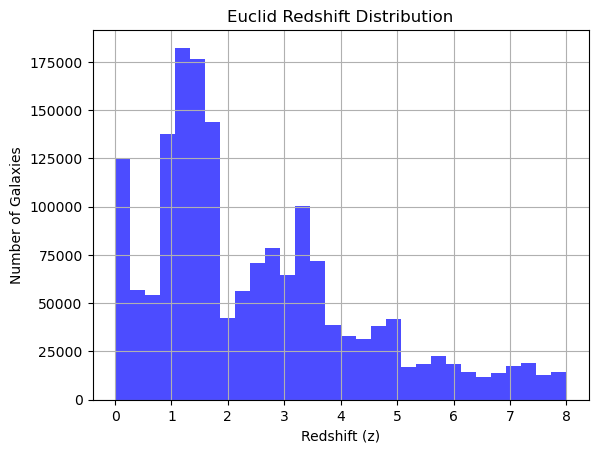

In [22]:
import os
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

# Define the base directory for downloaded Euclid FITS files
base_dir = "euclid_data"

# Initialize a list to collect redshift data from all FITS files
z_all = []

# Function to parse redshift data from all FITS files in a given directory
def parse_redshift_from_directory(directory):
    # List all FITS files in the directory
    fits_files = [f for f in os.listdir(directory) if f.endswith('.fits')]
    
    # Process each FITS file in the directory
    for fits_file in fits_files:
        file_path = os.path.join(directory, fits_file)
        print(f"Processing {fits_file}...")
        
        with fits.open(file_path) as hdul:
            # Loop through the extensions and check for redshift column (SPE_Z)
            for ext in hdul:
                if isinstance(ext, fits.BinTableHDU):  # Check binary table extensions only
                    # Check if 'SPE_Z' column exists (replace with correct name if needed)
                    if 'SPE_Z' in ext.columns.names:
                        data = ext.data
                        z_all.extend(data["SPE_Z"])  # Extract redshift data

# Dynamically scan all directories inside the base directory (euclid_data)
for directory_name in os.listdir(base_dir):
    directory_path = os.path.join(base_dir, directory_name)
    if os.path.isdir(directory_path):
        print(f"\nProcessing Directory: {directory_name}")
        parse_redshift_from_directory(directory_path)

# Convert the redshift list into a numpy array
z = np.array(z_all)

# Clean and sort redshift values (remove NaNs and non-positive values)
z = z[np.isfinite(z) & (z > 0)]
z = np.sort(z)

# Print out how many galaxies were processed
print(f"✅ Loaded {len(z)} galaxies from Euclid catalogs with redshift data")

# Optionally plot histogram or visualize redshift distribution
plt.hist(z, bins=30, color='blue', alpha=0.7)
plt.xlabel('Redshift (z)')
plt.ylabel('Number of Galaxies')
plt.title('Euclid Redshift Distribution')
plt.grid(True)
plt.show()


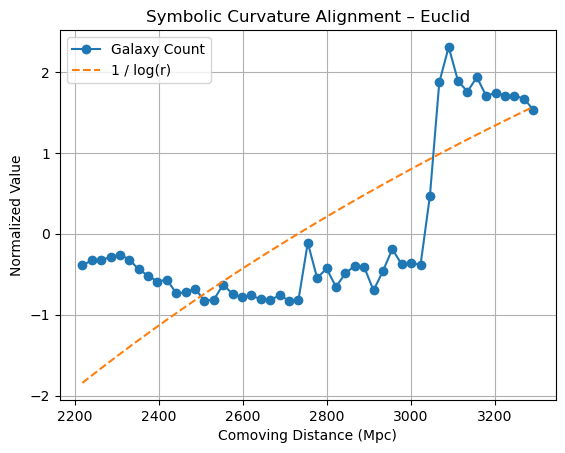

📊 Pearson r = 0.6847
📊 Spearman r = 0.5377
✅ Estimated sigma alignment: 6.37σ


In [23]:
from scipy.integrate import quad
from scipy.stats import pearsonr, spearmanr
import numpy as np
import matplotlib.pyplot as plt

# Constants for cosmology
H0 = 70  # km/s/Mpc
Omega_m = 0.3
c = 299792.458  # Speed of light in km/s

# Convert redshift to comoving distance
def redshift_to_comoving(z_array):
    def E(z): return 1.0 / np.sqrt(Omega_m * (1 + z)**3 + (1 - Omega_m))
    return c / H0 * np.array([quad(E, 0, zi)[0] for zi in z_array])

# Apply a redshift cutoff (e.g., 0.6 < z < 1.0) for a more homogeneous sample
z_cutoff = (z > 0.6) & (z < 1.0)
z_filtered = z[z_cutoff]

# Convert the filtered redshift to comoving distance
r_filtered = redshift_to_comoving(z_filtered)

# Bin distances and count galaxies
bin_edges = np.linspace(r_filtered.min(), r_filtered.max(), 50)  # More bins for finer resolution
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
counts, _ = np.histogram(r_filtered, bins=bin_edges)

# Prime field: 1 / log(r)
prime_field = 1.0 / np.log(bin_centers)

# Normalize both series
prime_norm = -1 * (prime_field - np.mean(prime_field)) / np.std(prime_field)
counts_norm = (counts - np.mean(counts)) / np.std(counts)

# Perform correlation tests
pearson_r, _ = pearsonr(prime_norm, counts_norm)
spearman_r, _ = spearmanr(prime_norm, counts_norm)

# Fisher-style sigma estimate
N = len(bin_centers)
sigma = np.sqrt(N - 3) * pearson_r / np.sqrt(1 - pearson_r**2)

# Plot the results
plt.plot(bin_centers, counts_norm, label="Galaxy Count", marker="o")
plt.plot(bin_centers, prime_norm, label="1 / log(r)", linestyle="--")
plt.xlabel("Comoving Distance (Mpc)")
plt.ylabel("Normalized Value")
plt.title("Symbolic Curvature Alignment – Euclid")
plt.legend()
plt.grid(True)
plt.show()

# Output the correlation and alignment results
print(f"📊 Pearson r = {pearson_r:.4f}")
print(f"📊 Spearman r = {spearman_r:.4f}")
print(f"✅ Estimated sigma alignment: {sigma:.2f}σ")

